<a href="https://colab.research.google.com/github/lisphilar/covid19-sir/blob/master/example/02_data_engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data engineering
With [Data preparation tutorial](https://github.com/lisphilar/covid19-sir/blob/master/example/01_data_preparation.ipynb), we prepared datasets (geospatial time-series data) to analyze.  As the next step of data engineering, we will perform the followings here.

1. Data cleaning
2. Data transformation
3. Arithmetic operations
4. EDA at a geospatial layer
5. Data subsetting for a location and data complement
6. EDA of subset

Note that EDA = explanatory data analysis

In [1]:
from pprint import pprint
try:
    import covsirphy as cs
except ImportError:
    !pip install --upgrade "git+https://github.com/lisphilar/covid19-sir.git#egg=covsirphy" -qq
    import covsirphy as cs
import numpy as np
cs.__version__

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 167 kB 3.1 MB/s 
     |████████████████████████████████| 51 kB 6.0 MB/s 
     |████████████████████████████████| 486 kB 39.9 MB/s 
     |████████████████████████████████| 2.0 MB 46.8 MB/s 
     |████████████████████████████████| 62 kB 1.4 MB/s 
     |████████████████████████████████| 235 kB 58.4 MB/s 
     |████████████████████████████████| 998 kB 59.7 MB/s 
     |████████████████████████████████| 308 kB 52.1 MB/s 
     |████████████████████████████████| 96.9 MB 109 kB/s 
     |████████████████████████████████| 1.0 MB 48.3 MB/s 
     |████████████████████████████████| 16.7 MB 32.9 MB/s 
     |████████████████████████████████| 6.3 MB 51.0 MB/s 
     |████████████████████████████████| 209 kB 51.7 MB/s 
     |████████████████████████████████| 81 kB 9.0 MB/s 
     |████████████████████████████████| 78 kB 7.7 MB/s 
     |██████

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


'2.24.0-omicron'

We will use the recommended datasets at country-level data as an example.

In [2]:
eng = cs.DataEngineer()
eng.download()
eng.all().info()

Retrieving COVID-19 dataset from https://github.com/lisphilar/covid19-sir/data/
Retrieving datasets from COVID-19 Data Hub https://covid19datahub.io/
Retrieving datasets from COVID-19 Open Data by Google Cloud Platform https://github.com/GoogleCloudPlatform/covid-19-open-data
Retrieving datasets from Our World In Data https://github.com/owid/covid-19-data/
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210976 entries, 0 to 210975
Data columns (total 36 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   ISO3                                 210976 non-null  category      
 1   Province                             210976 non-null  category      
 2   City                                 210976 non-null  category      
 3   Date                                 210976 non-null  datetime64[ns]
 4   Cancel_events                        167216 non-null  object        
 5   Confirm

## 1. Data cleaning
`DataEngineer().clean()` performs the following data cleaning functionalities. By applying a list of strings to `kinds` argument (eg. `kinds=["resample"]`), we can specify the cleaning method(s).


* "convert_date": Convert dtype of date column to pandas.Timestamp.
* "resample": Resample records with dates.
* "fillna": Fill NA values with '-' (layers) and the previous values and 0.

In [3]:
eng.clean()
eng.all().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211041 entries, 0 to 211040
Data columns (total 36 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   ISO3                                 211041 non-null  category      
 1   Province                             211041 non-null  category      
 2   City                                 211041 non-null  category      
 3   Date                                 211041 non-null  datetime64[ns]
 4   Cancel_events                        211041 non-null  Int64         
 5   Confirmed                            211041 non-null  Int64         
 6   Contact_tracing                      211041 non-null  Int64         
 7   Country                              211041 non-null  object        
 8   Fatal                                211041 non-null  Int64         
 9   Gatherings_restrictions              211041 non-null  Int64         
 

## 2. Data transformation
Transform all registered data, calculating the number of susceptible and infected cases. This is required to analyze real data with SIR-derived models.

- Susceptible = Population - Confirmed
- Infected = Confirmed - Fatal - Recovered

In [4]:
main_variables = ["Population", "Susceptible", "Confirmed", "Infected", "Fatal", "Recovered"]

In [5]:
eng.transform()
eng.all(variables=main_variables).tail()

ISO3 Province City       Date  Population  Susceptible  Confirmed  \
211036  ZWE        -    - 2022-08-01    14439018     14182636     256382   
211037  ZWE        -    - 2022-08-02    14439018     14182615     256403   
211038  ZWE        -    - 2022-08-03    14439018     14182595     256423   
211039  ZWE        -    - 2022-08-04    14439018     14182574     256444   
211040  ZWE        -    - 2022-08-05    14439018     14182574     256444   

        Infected  Fatal  Recovered  
211036    167811   5577      82994  
211037    167831   5578      82994  
211038    167850   5579      82994  
211039    167869   5581      82994  
211040    167869   5581      82994

Recalculation of "Population" and "Confirmed" can be performed with `DataEngineer().inverse_transform()`, if necessary. (No impact with this example data.)

In [6]:
eng.inverse_transform()
eng.all(variables=main_variables).tail()

ISO3 Province City       Date  Population  Susceptible  Confirmed  \
211036  ZWE        -    - 2022-08-01    14439018     14182636     256382   
211037  ZWE        -    - 2022-08-02    14439018     14182615     256403   
211038  ZWE        -    - 2022-08-03    14439018     14182595     256423   
211039  ZWE        -    - 2022-08-04    14439018     14182574     256444   
211040  ZWE        -    - 2022-08-05    14439018     14182574     256444   

        Infected  Fatal  Recovered  
211036    167811   5577      82994  
211037    167831   5578      82994  
211038    167850   5579      82994  
211039    167869   5581      82994  
211040    167869   5581      82994

## 3. Arithmetic operations
We can perform arithmetic operations to add new columns.

* `.diff(column, suffix="_diff", freq="D")`: Calculate daily new cases with "f(x>0) = F(x) - F(x-1), x(0) = 0 when F is cumulative numbers".
* `.add(columns, new=None, fill_value=0)`: Calculate element-wise addition with pandas.DataFrame.sum(axis=1), X1 + X2 + X3 +...
* `.mul(columns, new=None, fill_value=0)`: Calculate element-wise multiplication with pandas.DataFrame.product(axis=1), X1 * X2 * X3 *...
* `.sub(minuend, subtrahend, new=None, fill_value=0)`: Calculate element-wise subtraction with pandas.Series.sub(), minuend - subtrahend.
* `.div(columns, new=None, fill_value=0)`: Calculate element-wise floating division with pandas.Series.div(), numerator / denominator.
* `.assign(**kwargs))`: Assign a new column with pandas.DataFrame.assign().


In [7]:
# Diff
eng.diff(column="Confirmed", suffix="_diff", freq="D")
eng.all(variables=["Confirmed", "Confirmed_diff"]).tail()

ISO3 Province City       Date  Confirmed  Confirmed_diff
211036  ZWE        -    - 2022-08-01     256382               4
211037  ZWE        -    - 2022-08-02     256403              21
211038  ZWE        -    - 2022-08-03     256423              20
211039  ZWE        -    - 2022-08-04     256444              21
211040  ZWE        -    - 2022-08-05     256444               0

In [8]:
# Addition
eng.add(columns=["Fatal", "Recovered"])
eng.all(variables=["Fatal", "Recovered", "Fatal+Recovered"]).tail()

ISO3 Province City       Date  Fatal  Recovered  Fatal+Recovered
211036  ZWE        -    - 2022-08-01   5577      82994            88571
211037  ZWE        -    - 2022-08-02   5578      82994            88572
211038  ZWE        -    - 2022-08-03   5579      82994            88573
211039  ZWE        -    - 2022-08-04   5581      82994            88575
211040  ZWE        -    - 2022-08-05   5581      82994            88575

In [9]:
# Multiplication
eng.mul(columns=["Confirmed", "Recovered"])
eng.all(variables=["Confirmed", "Recovered", "Confirmed*Recovered"]).tail()

ISO3 Province City       Date  Confirmed  Recovered  \
211036  ZWE        -    - 2022-08-01     256382      82994   
211037  ZWE        -    - 2022-08-02     256403      82994   
211038  ZWE        -    - 2022-08-03     256423      82994   
211039  ZWE        -    - 2022-08-04     256444      82994   
211040  ZWE        -    - 2022-08-05     256444      82994   

        Confirmed*Recovered  
211036          21278167708  
211037          21279910582  
211038          21281570462  
211039          21283313336  
211040          21283313336

In [10]:
# Division
eng.div(numerator="Confirmed", denominator="Tests", new="Positive_rate")
# Assignment of new a new column
eng.assign(**{"Positive_rate_%": lambda x: x["Positive_rate"] * 100})
eng.all(variables=["Tests", "Confirmed", "Positive_rate_%"]).tail()

ISO3 Province City       Date    Tests  Confirmed  Positive_rate_%
211036  ZWE        -    - 2022-08-01  2379907     256382        10.772774
211037  ZWE        -    - 2022-08-02  2379907     256403        10.773656
211038  ZWE        -    - 2022-08-03  2379907     256423        10.774497
211039  ZWE        -    - 2022-08-04  2379907     256444        10.775379
211040  ZWE        -    - 2022-08-05  2379907     256444        10.775379

## 4. EDA at a geospatial layer
`DataEngineer().layer()` returns the data at the selected layer in the date range.

Arguments:

* geo (tuple(list[str] or tuple(str) or str) or str or None): location names to specify the layer or None (the top level)
* start_date (str or None): start date, like 22Jan2020
* end_date (str or None): end date, like 01Feb2020
* variables (list[str] or None): list of variables to add or None (all available columns)

In [11]:
eng.layer().tail()

ISO3 Province City       Date  Cancel_events  Confirmed  \
211036  ZWE        -    - 2022-08-01              1     256382   
211037  ZWE        -    - 2022-08-02              1     256403   
211038  ZWE        -    - 2022-08-03              1     256423   
211039  ZWE        -    - 2022-08-04              1     256444   
211040  ZWE        -    - 2022-08-05              1     256444   

        Confirmed*Recovered  Confirmed_diff  Contact_tracing   Country  ...  \
211036          21278167708               4                1  Zimbabwe  ...   
211037          21279910582              21                1  Zimbabwe  ...   
211038          21281570462              20                1  Zimbabwe  ...   
211039          21283313336              21                1  Zimbabwe  ...   
211040          21283313336               0                1  Zimbabwe  ...   

          Tests  Transport_closing  Vaccinated_1st  Vaccinated_2nd  \
211036  2379907                  0               0               0   
211037  2379907                  0               0               0   
211038  2379907                  0               0               0   
211039  2379907                  0               0               0   
211040  2379907                  0               0               0   

        Vaccinated_3rd  Vaccinated_full  Vaccinated_once  Vaccinations  \
211036               0          4692440          6376117      12182698   
211037               0          4692440          6376117      12182698   
211038               0          4692440          6376117      12182698   
211039               0          4692440          6376117      12182698   
211040               0          4692440          6376117      12182698   

        Vaccinations_boosters  Workplace_closing  
211036                1114141                  1  
211037                1114141                  1  
211038                1114141                  1  
211039                1114141                  1  
211040                1114141                  1  

[5 rows x 43 columns]

This dataset has only country-level data and `geo` should be country name. We can select the followings as `geo` argument for EDA at a geospatial layer when we have adequate data.

* When `geo=None` or `geo=(None,)`, returns country-level data, assuming we have country/province/city as layers here.
* When `geo=("Japan",)` or `geo="Japan"`, returns province-level data in Japan.
* When `geo=(["Japan", "UK"],)`, returns province-level data in Japan and UK.
* When `geo=("Japan", "Kanagawa")`, returns city-level data in Kanagawa/Japan.
* When `geo=("Japan", ["Tokyo", "Kanagawa"])`, returns city-level data in Tokyo/Japan and Kanagawa/Japan.

Additionally, we can create a choropleth map with a data at a geospatial layer on a date.

arguments of `DataEngineer().choropleth()`:

* geo (tuple(list[str] or tuple(str) or str) or str or None): location names to specify the layer or None (the top level)
* variable (str): variable name to show
* on (str or None): the date, like 22Jan2020, or None (the last date of each location)
* title (str): title of the map
* filename (str or None): filename to save the figure or None (display)
* logscale (bool): whether convert the value to log10 scale values or not
* directory (str): directory to save GeoJSON file of "Natural Earth" GitHub repository
* natural_earth (str or None): title of GeoJSON file (without extension) of "Natural Earth" GitHub repository or None (automatically determined)
* **kwargs: keyword arguments of the following classes and methods.
    * matplotlib.pyplot.savefig(), matplotlib.pyplot.legend(), and
    * pandas.DataFrame.plot()

Retrieving GIS data from Natural Earth https://www.naturalearthdata.com/


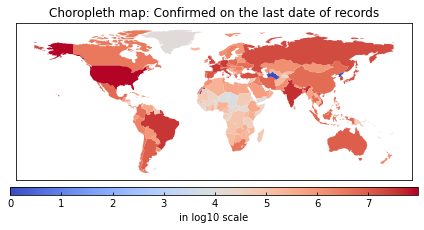

In [12]:
eng.choropleth(geo=None, variable="Confirmed", title="Choropleth map: Confirmed on the last date of records", filename=None)

## 5. Data subsetting for a location and data complement
The dataset is a geospatial time-series data. By selecting a location, the dataset will be converted to a time-series data, which is easier to analyze.

### 5.1 Subsetting
We will create a subset for selected location (eg. country, province/prefecture/state, city). Because the loaded dataset has country-level data, total values in United Kingdom (UK) on dates will be created here as an example.

Arguments of `DataEngineer().subset()`:
* geo (tuple(list[str] or tuple(str) or str) or str or None): location names to filter or None (total at the top level)
* start_date (str or None): start date, like 22Jan2020
* end_date (str or None): end date, like 01Feb2020
* variables (list[str] or None): list of variables to add or None (all available columns)
* complement (bool): whether perform data complement or not, True as default
* **Kwargs: keyword arguments for complement and default values
    * recovery_period (int): expected value of recovery period [days], 17
    * interval (int): expected update interval of the number of recovered cases [days], 2
    * max_ignored (int): Max number of recovered cases to be ignored [cases], 100
    * max_ending_unupdated (int): Max number of days to apply full complement, where max recovered cases are not updated [days], 14
    * upper_limit_days (int): maximum number of valid partial recovery periods [days], 90
    * lower_limit_days (int): minimum number of valid partial recovery periods [days], 7
    * upper_percentage (float): fraction of partial recovery periods with value greater than upper_limit_days, 0.5
    * lower_percentage (float): fraction of partial recovery periods with value less than lower_limit_days, 0.5

NOTE:  
We can select the followings as `geo` argument for subsetting when we have adequate data.
* When `geo=None` or `geo=(None,)`, returns total values of all country-level data, assuming we have country/province/city as layers here.
* When `geo=("Japan",)` or `geo="Japan"`, returns country-level data in Japan.
* When `geo=(["Japan", "UK"],)`, returns country-level data of Japan and UK.
* When `geo=("Japan", "Tokyo")`, returns province-level data of Tokyo/Japan.
* When `geo=("Japan", ["Tokyo", "Kanagawa"])`, returns total values of province-level data of Tokyo/Japan and Kanagawa/Japan.
* When `geo=("Japan", "Kanagawa", "Yokohama")`, returns city-level data of Yokohama/Kanagawa/Japan.
* When `geo=(("Japan", "Kanagawa", ["Yokohama", "Kawasaki"])`, returns total values of city-level data of Yokohama/Kanagawa/Japan and Kawasaki/Kanagawa/Japan.



{}


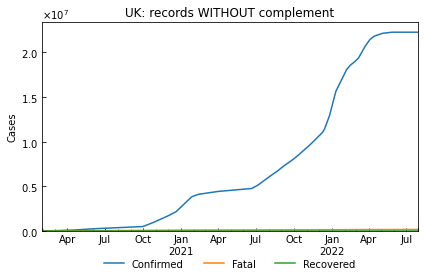

In [13]:
# Without complement
without_df, status, status_dict = eng.subset(geo="UK", complement=False)
print(f"{status}\n")
pprint(status_dict)
cs.line_plot(without_df[["Confirmed", "Fatal", "Recovered"]], title="UK: records WITHOUT complement")

monotonic increasing complemented confirmed data and 
monotonic increasing complemented fatal data and 
partially complemented recovered data

{'Full_recovered': False,
 'Monotonic_confirmed': True,
 'Monotonic_fatal': True,
 'Monotonic_recovered': True,
 'Partial_recovered': True}


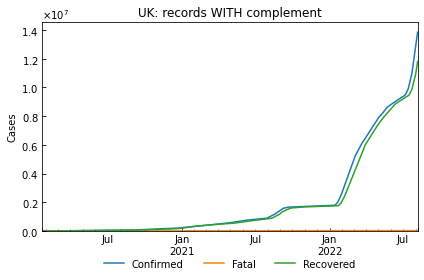

In [14]:
# With complement (default)
with_df, status, status_dict = eng.subset(geo="Japan", complement=True)
print(f"{status}\n")
pprint(status_dict)
cs.line_plot(with_df[["Confirmed", "Fatal", "Recovered"]], title="UK: records WITH complement")

### 5.2 Details of data complement
When `complement=True` (default), data complement will be performed for confirmed/fatal/recovered data. This may be required for analysis because reported cumulative values sometimes show decreasing by changing accidentally for an example. Additionally, some countries, including UK, do not report the number of recovered cases.

The possible kinds of complement for each country are the following:

* "Monotonic_confirmed/fatal/recovered" (monotonic increasing complement) Force the variable show monotonic increasing.
* "Full_recovered" (full complement of recovered data) Estimate the number of recovered cases using the value of estimated average recovery period.
* "Partial_recovered" (partial complement of recovered data) When recovered values are not updated for some days, extrapolate the values.

### 5.3 Recovery period
What is "recovery period"?  
We defined "recovery period" as the time period between case confirmation and recovery (as it is subjectively defined per country). We can estimate the mode value of recovery period with class method `DataEngineer.recovery_period(data)`.

In [15]:
jpn_df, *_ = eng.subset(geo="Japan", variables=["Confirmed", "Fatal", "Recovered"], complement=False)
recovery_period = cs.DataEngineer.recovery_period(data=jpn_df)
print(f"Mode value of recovery period in Japan: {recovery_period} [days]")

Mode value of recovery period in Japan: 10 [days]


Details of recovery period calculation:

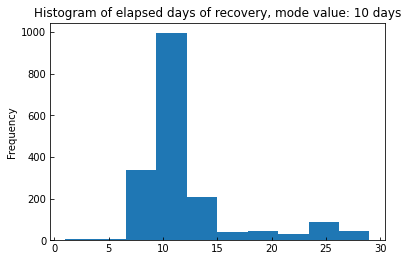

In [16]:
df = jpn_df.resample("D").sum()
df["diff"] = df["Confirmed"] - df["Fatal"]
df = df.loc[:, ["diff", "Recovered"]].unstack().reset_index()
df.columns = ["Variable", "Date", "Number"]
df["Days"] = (df["Date"] - df["Date"].min()).dt.days
df = df.pivot_table(values="Days", index="Number", columns="Variable")
df = df.interpolate(limit_area="inside").dropna().astype(np.int64)
df["Elapsed"] = df["Recovered"] - df["diff"]
df = df.loc[df["Elapsed"] > 0]
# Calculate mode value
mode_value = round(df["Elapsed"].mode().mean())
df["Elapsed"].plot.hist(title=f"Histogram of elapsed days of recovery, mode value: {mode_value} days");

### 5.4 Alias of subsets
We can register alias names of subsets with `DataEngineer().subset_alias()`.

Arguments:  
* alias (str or None): alias name or None (list-up alias names)
* update (bool): force updating the alias when @alias is not None
* **kwargs: keyword arguments of covsirphy.DataEngineer().subset()

In [17]:
# Register
sub1, *_ = eng.subset_alias(alias="UK_with", geo="UK", complement=True)
# Retrieve with alias
sub2, *_ = eng.subset_alias(alias="UK_with")
# Comparison
sub1.equals(sub2)

True

## 7. EDA of subset
With explanatory data analysis, we will get the figure of datasets.

### 7.1 Alias of variables
We can specify variables with alias. For example, "CIFR" is equivalent to list `['Confirmed', 'Infected', 'Recovered', 'Fatal']`.

In [18]:
eng.subset(geo="Japan", variables="CIRF")[0].tail()

Confirmed  Infected  Recovered  Fatal
Date                                             
2022-08-02   12917500   1835092   11049714  32694
2022-08-03   13113301   1862871   11217611  32819
2022-08-04   13344898   1914003   11397919  32976
2022-08-05   13598290   1978752   11586379  33159
2022-08-06   13835099   2011983   11789768  33348

All aliases can be checked with `DataEngineer().variables_alias()`.

In [19]:
eng.variables_alias()

{'C': ['Confirmed'],
 'CFR': ['Confirmed', 'Fatal', 'Recovered'],
 'CIRF': ['Confirmed', 'Infected', 'Recovered', 'Fatal'],
 'CR': ['Confirmed', 'Recovered'],
 'F': ['Fatal'],
 'I': ['Infected'],
 'N': ['Population'],
 'R': ['Recovered'],
 'S': ['Susceptible'],
 'SIRF': ['Susceptible', 'Infected', 'Recovered', 'Fatal'],
 'T': ['Tests']}

We can register new alias "p" with `["Tests", "Confirmed", "Positive_rate_%"]` as an example.

In [20]:
# Register new alias
eng.variables_alias(alias="p", variables=["Tests", "Confirmed", "Positive_rate_%"])
# Check the contents of an alias
eng.variables_alias(alias="p")
# Subsetting with the variable alias
eng.subset_alias(alias="jp", geo="Japan", variables="p")[0].tail()

Tests  Confirmed  Positive_rate_%
Date                                            
2022-08-02  63056027   12917500         20.48575
2022-08-03  63387469   13113301        20.687529
2022-08-04  63817464   13344898        20.911044
2022-08-05  64104711   13598290        21.212622
2022-08-06  64462892   13835099        21.462113

### 7.2 Line plot
Show data with line plot. We can select function `line_plot` or class `LinePlot`.

In [21]:
line_df, *_ = eng.subset_alias(alias="jp")

With function:

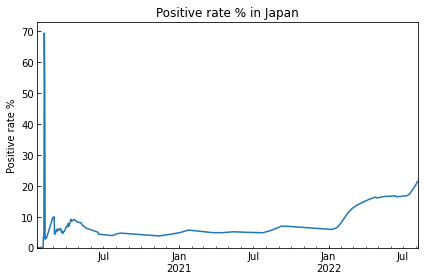

In [22]:
cs.line_plot(
    line_df["Positive_rate_%"],
    title="Positive rate % in Japan",
    ylabel="Positive rate %",
    math_scale=False,
    show_legend=False,
    filename=None,
)

With class:

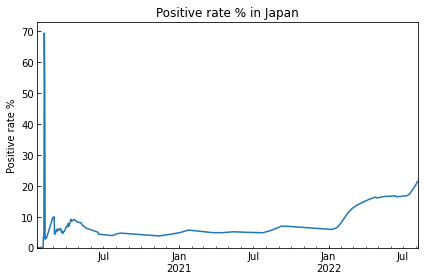

In [23]:
with cs.LinePlot(filename=None) as lp:
    lp.plot(line_df["Positive_rate_%"])
    lp.title = "Positive rate % in Japan"
    lp.x_axis(xlabel=None)
    lp.y_axis(ylabel="Positive rate %", math_scale=False)
    lp.legend_hide()

### 7.3 Scatter plot
Show data with scatter plot. We can select function `scatter_plot` or class `ScatterPlot`.

In [24]:
sc_df, *_ = eng.subset_alias(alias="jp")
sc_df.rename(columns={"Tests": "x", "Confirmed": "y"}, inplace=True)

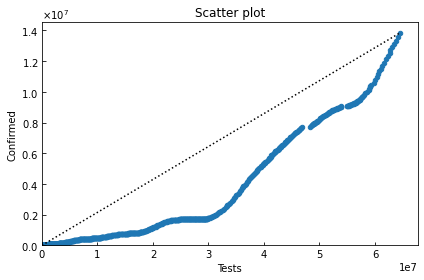

In [25]:
cs.scatter_plot(
    sc_df,
    title="Scatter plot",
    xlabel="Tests", xlim=(0, None),
    ylabel="Confirmed",
    filename=None,
)

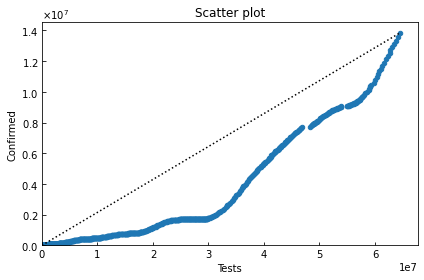

In [26]:
with cs.ScatterPlot(filename=None) as sp:
    sp.plot(sc_df)
    sp.title = "Scatter plot"
    sp.x_axis(xlabel="Tests", xlim=(0, None))
    sp.y_axis(ylabel="Confirmed")
    sp.line_straight(p1=(0, 0), p2=(max(sc_df["x"]), max(sc_df["y"])))

Thank you!